In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from vega_datasets import data

# Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
data.sf_temps().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [3]:
# Checking Data Type of "Data"
type(data)

vega_datasets.core.DataLoader

In [4]:
# Checking Data Type of "Data"
type(data.sf_temps())

pandas.core.frame.DataFrame

In [5]:
# Creating a data frame
df = pd.DataFrame(data.sf_temps())

In [6]:
# Making sure df looks good
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


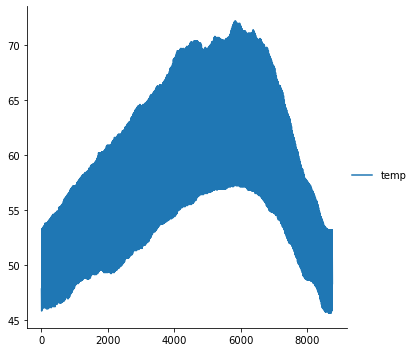

In [7]:
sns.relplot(data=df, kind="line")

In [8]:
# Checking features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [9]:
# Must reindex by date
df = df.set_index('date').sort_index()

In [10]:
# Resampling by day and taking average.  Saving it to "by_day"
by_day_avg = df.temp.resample('D').mean()

In [11]:
# Checking by_day to make sure it resampled correctly
by_day_avg.head()

date
2010-01-01    49.170833
2010-01-02    49.304167
2010-01-03    49.391667
2010-01-04    49.445833
2010-01-05    49.491667
Freq: D, Name: temp, dtype: float64

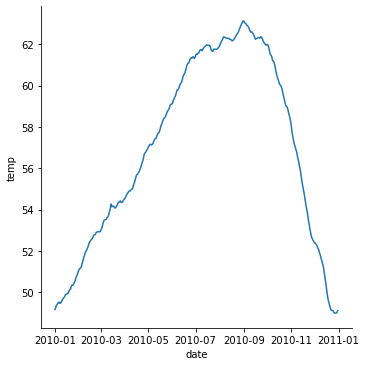

In [12]:
sns.relplot(data=by_day_avg, kind="line")

# Write the code necessary to visualize the minimum temperature over time.

In [13]:
# Grabbing only the lowest values for that time
by_day_min = df.temp.resample('D').min()

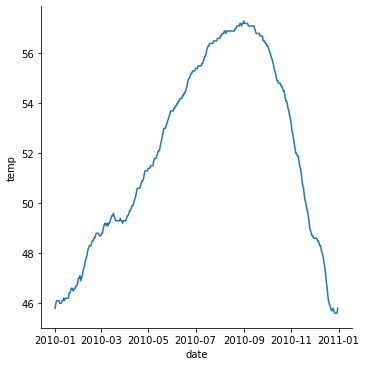

In [14]:
sns.relplot(data=by_day_min, kind="line")

# Write the code necessary to visualize the maximum temperature over time.

In [15]:
# Grabbing only the highest values for that time
by_day_max = df.temp.resample('D').max()

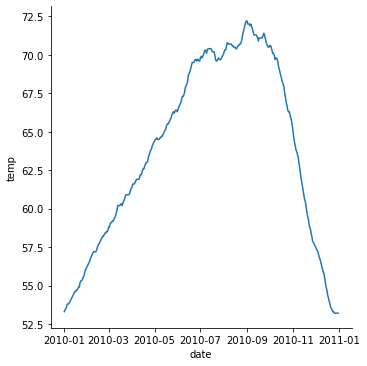

In [16]:
sns.relplot(data=by_day_max, kind="line")

# Which month is the coldest, on average?

In [18]:
# Resampling by month and taking the max.  Saving it to "by_month_max"
by_month_avg = df.temp.resample('M').mean()

In [19]:
# Checking to make sure it was resampled by month
by_month_avg.head()

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
Freq: M, Name: temp, dtype: float64

In [20]:
by_month_avg.idxmin()

Timestamp('2010-01-31 00:00:00', freq='M')

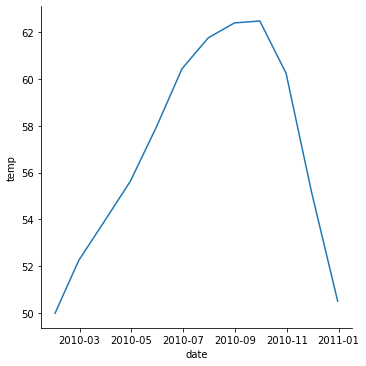

In [21]:
sns.relplot(data=by_month_avg, kind="line")


# Which month has the highest average temperature?

In [23]:
# Resampling by month and taking the avg.  Saving it to "by_month_avg"
by_month_avg = df.temp.resample('M').mean()

In [24]:
by_month_avg.idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

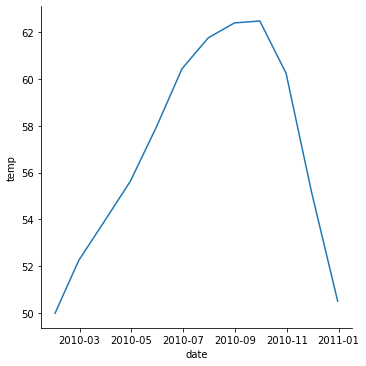

In [25]:
sns.relplot(data=by_month_avg, kind="line")

# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [26]:
# Grabbing only the highest values for that day
by_day_max = df.temp.resample('D').max()
by_day_min = df.temp.resample('D').min()

In [27]:
resampled_df = pd.DataFrame(by_day_max)

In [28]:
resampled_df = resampled_df.rename(columns={'temp': 'temp_max'})

In [29]:
resampled_df["temp_min"] = by_day_min

In [30]:
resampled_df.head()

,temp_max,temp_min
date,,
2010-01-01,53.3,45.8
2010-01-02,53.4,46.0
2010-01-03,53.5,46.1
2010-01-04,53.6,46.1
2010-01-05,53.8,46.1


In [31]:
resampled_df["change"] = resampled_df.temp_max - resampled_df.temp_min

In [32]:
resampled_df.head()

,temp_max,temp_min,change
date,,,
2010-01-01,53.3,45.8,7.5
2010-01-02,53.4,46.0,7.4
2010-01-03,53.5,46.1,7.4
2010-01-04,53.6,46.1,7.5
2010-01-05,53.8,46.1,7.7


In [33]:
resampled_by_month_max = resampled_df.change.resample('M').max()

In [34]:
resampled_by_month_max.sort_values(ascending=False).head(1)

date
2010-08-31    15.0
Name: change, dtype: float64